<a href="https://colab.research.google.com/github/diegomarlop/LAB_IRONHACK/blob/main/Lab4_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab | Feature extraction
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [54]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
#Open the categoricals variable we created before.
categoricals = data.select_dtypes(np.object)
categoricals.head()

<ipython-input-4-8ef099060344>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [5]:
categoricals = categoricals.drop('Customer',axis=1)

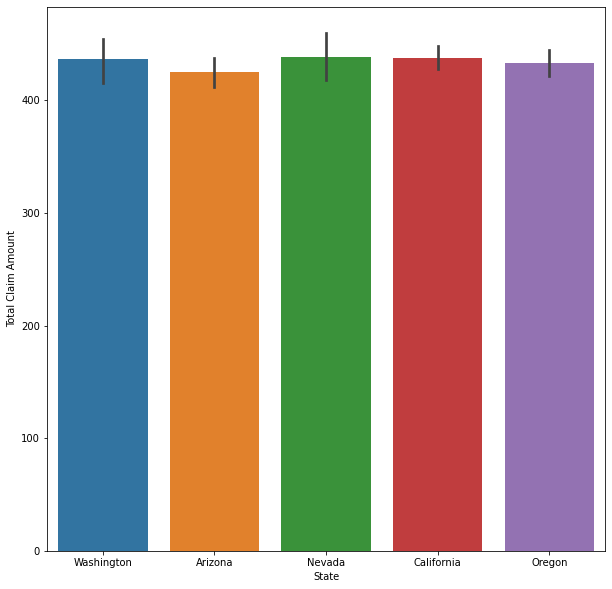

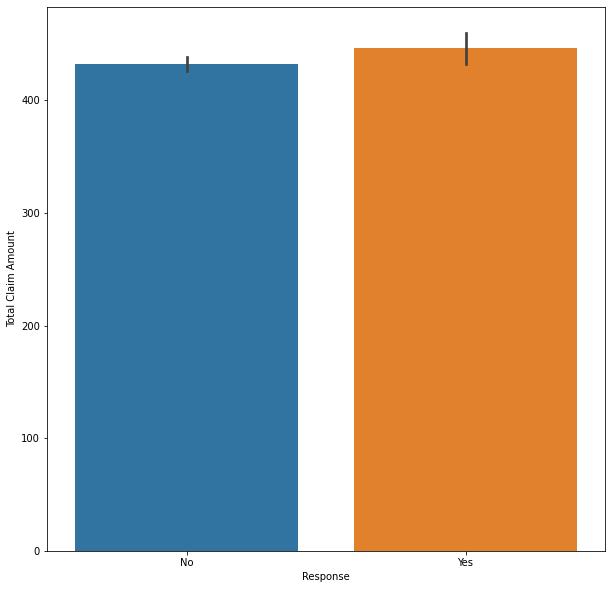

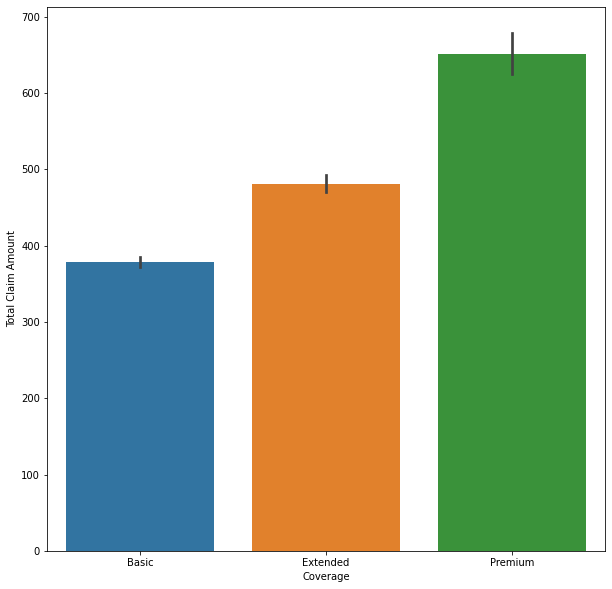

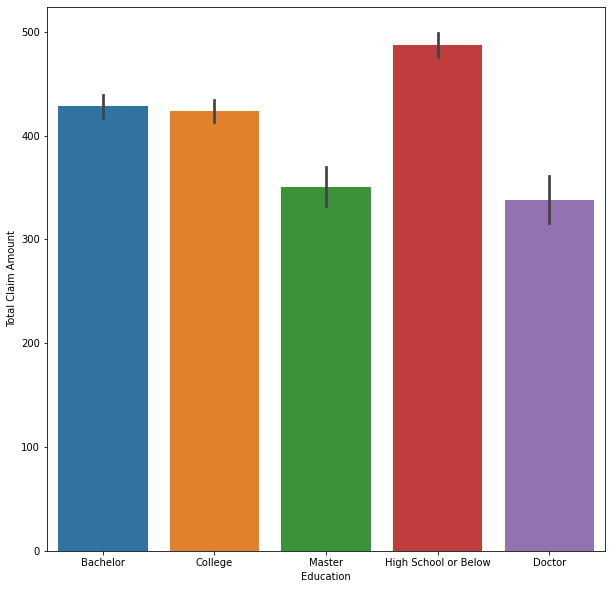

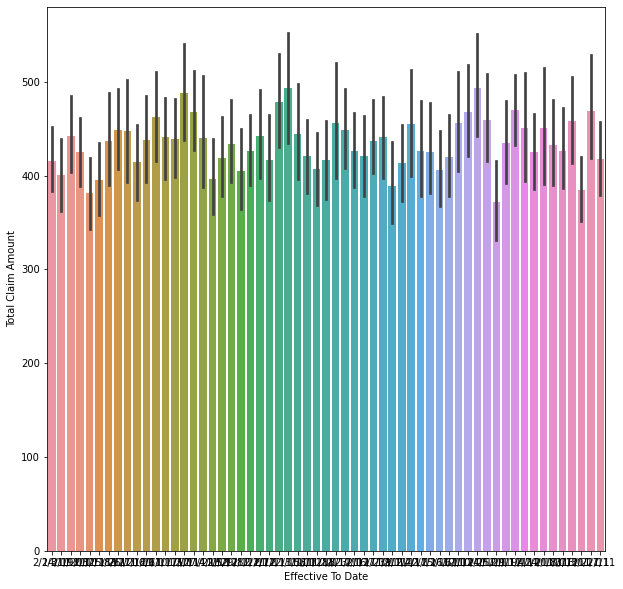

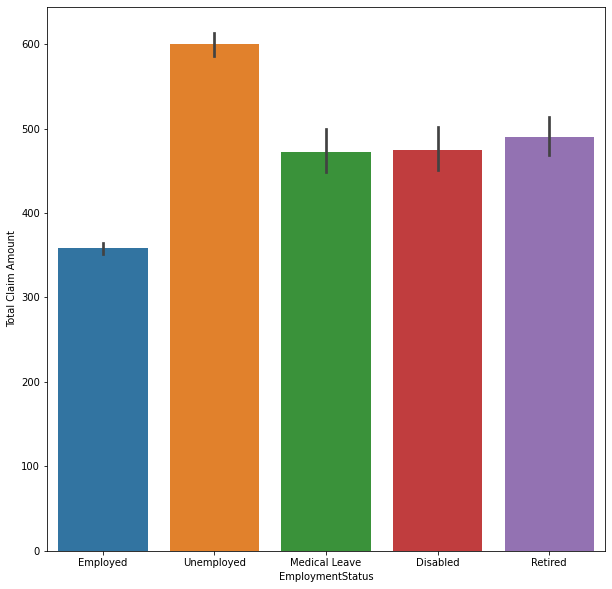

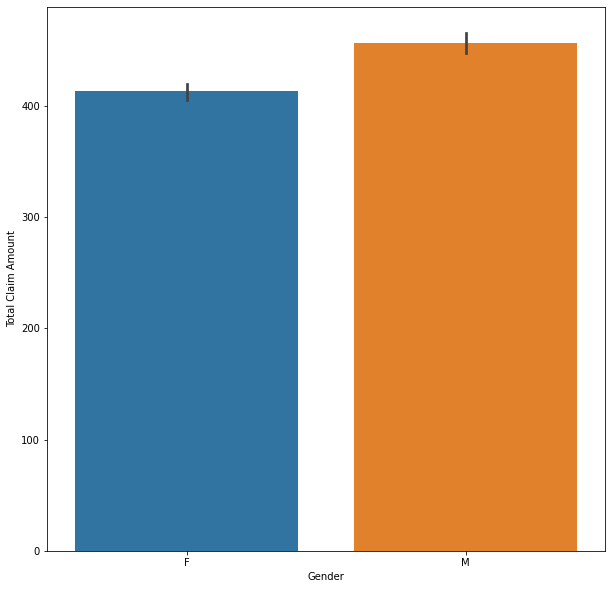

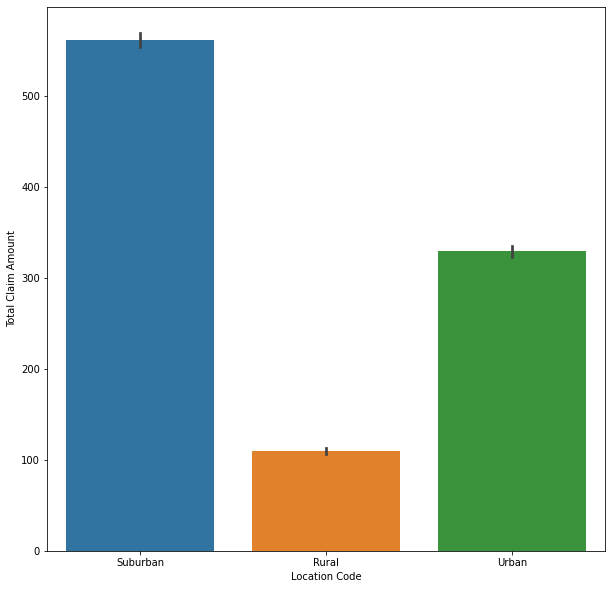

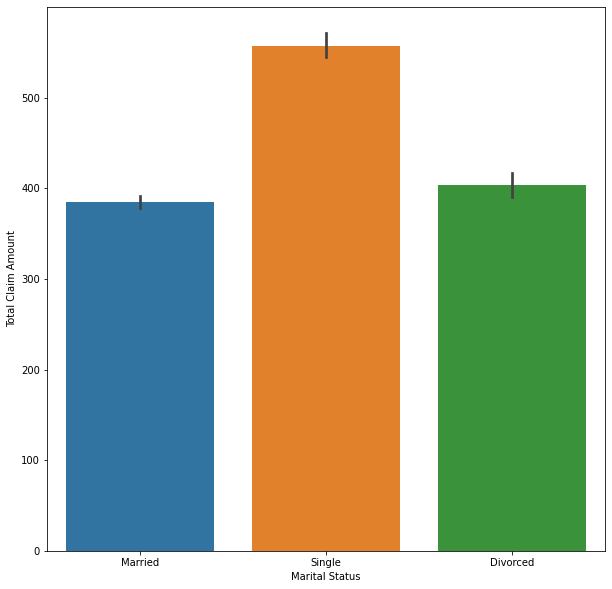

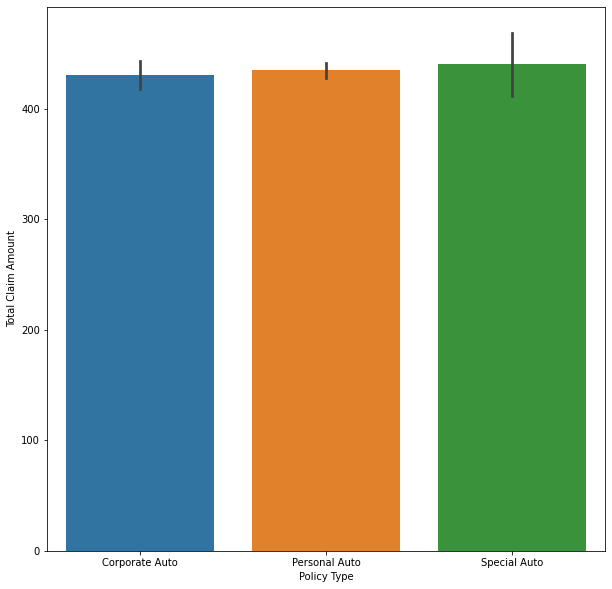

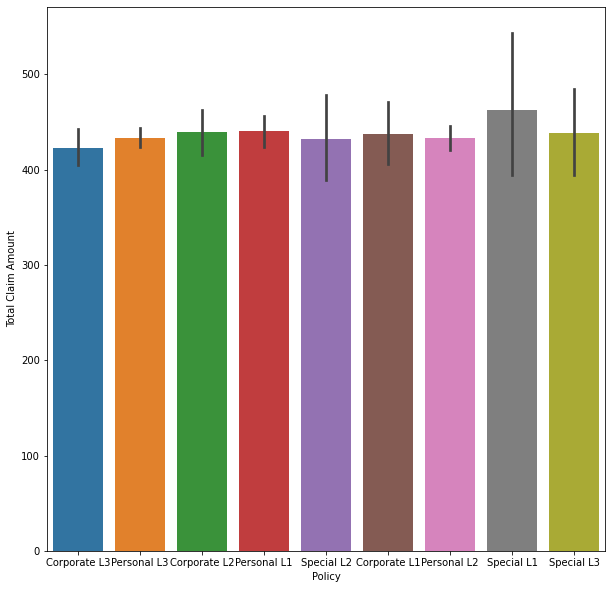

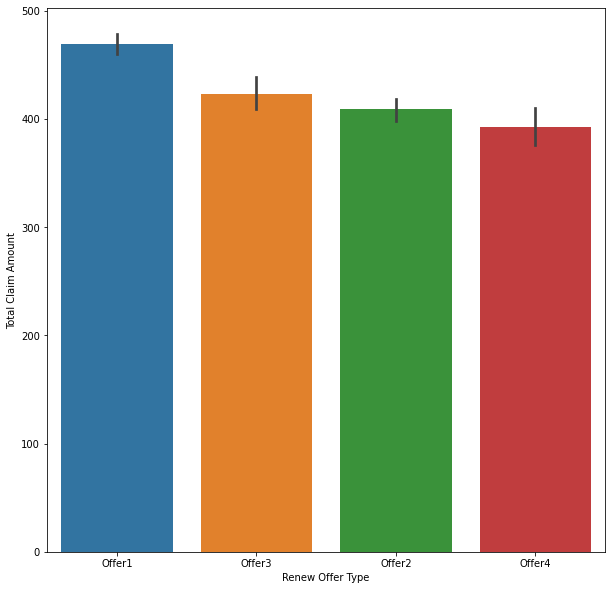

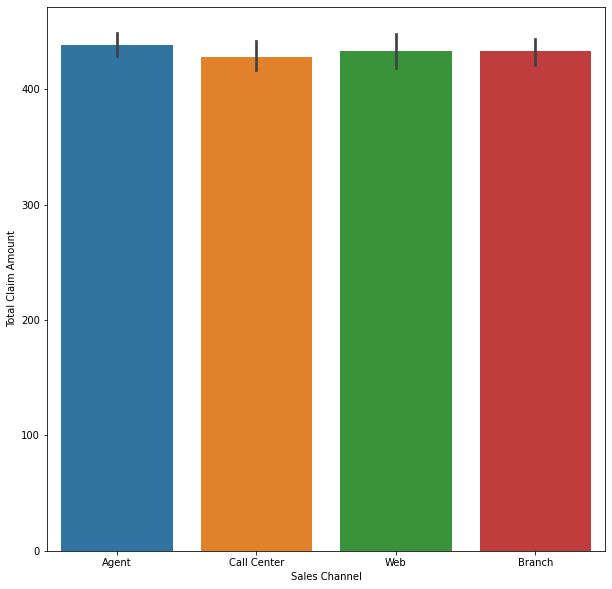

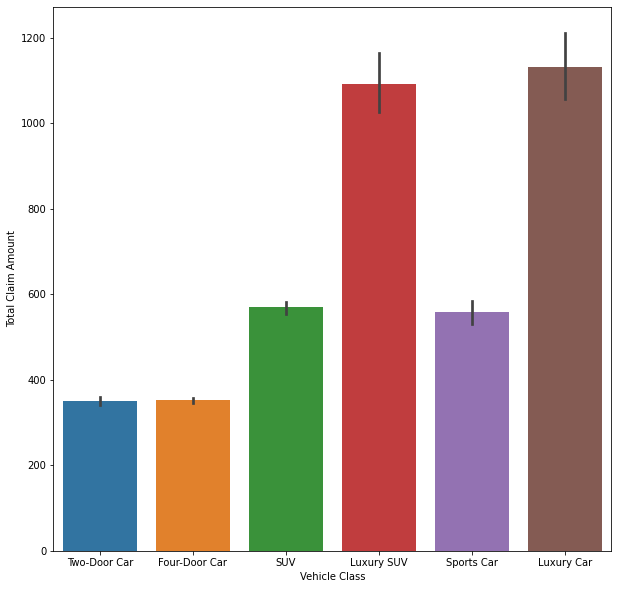

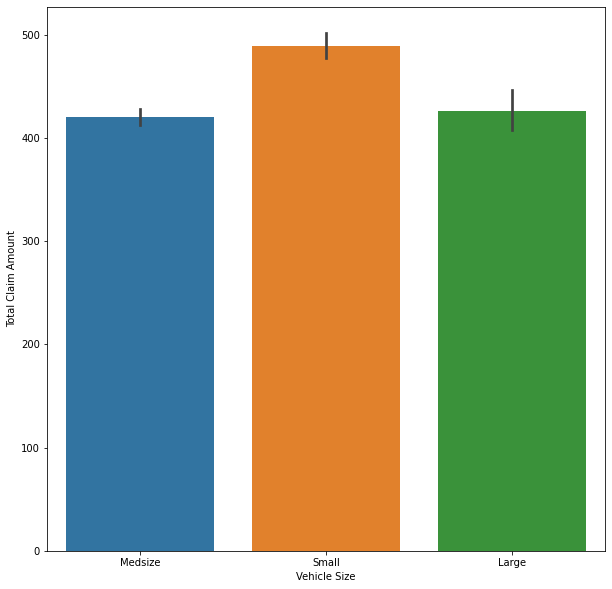

In [6]:
#Plot all the categorical variables with the proper plot. What can you see?
for i in categoricals:
  plt.figure(figsize=(10,10))
  sns.barplot(data=categoricals,x=i,y=data['Total Claim Amount'])
  plt.show()

In [ ]:
#Plot time variable. Can you extract something from it?

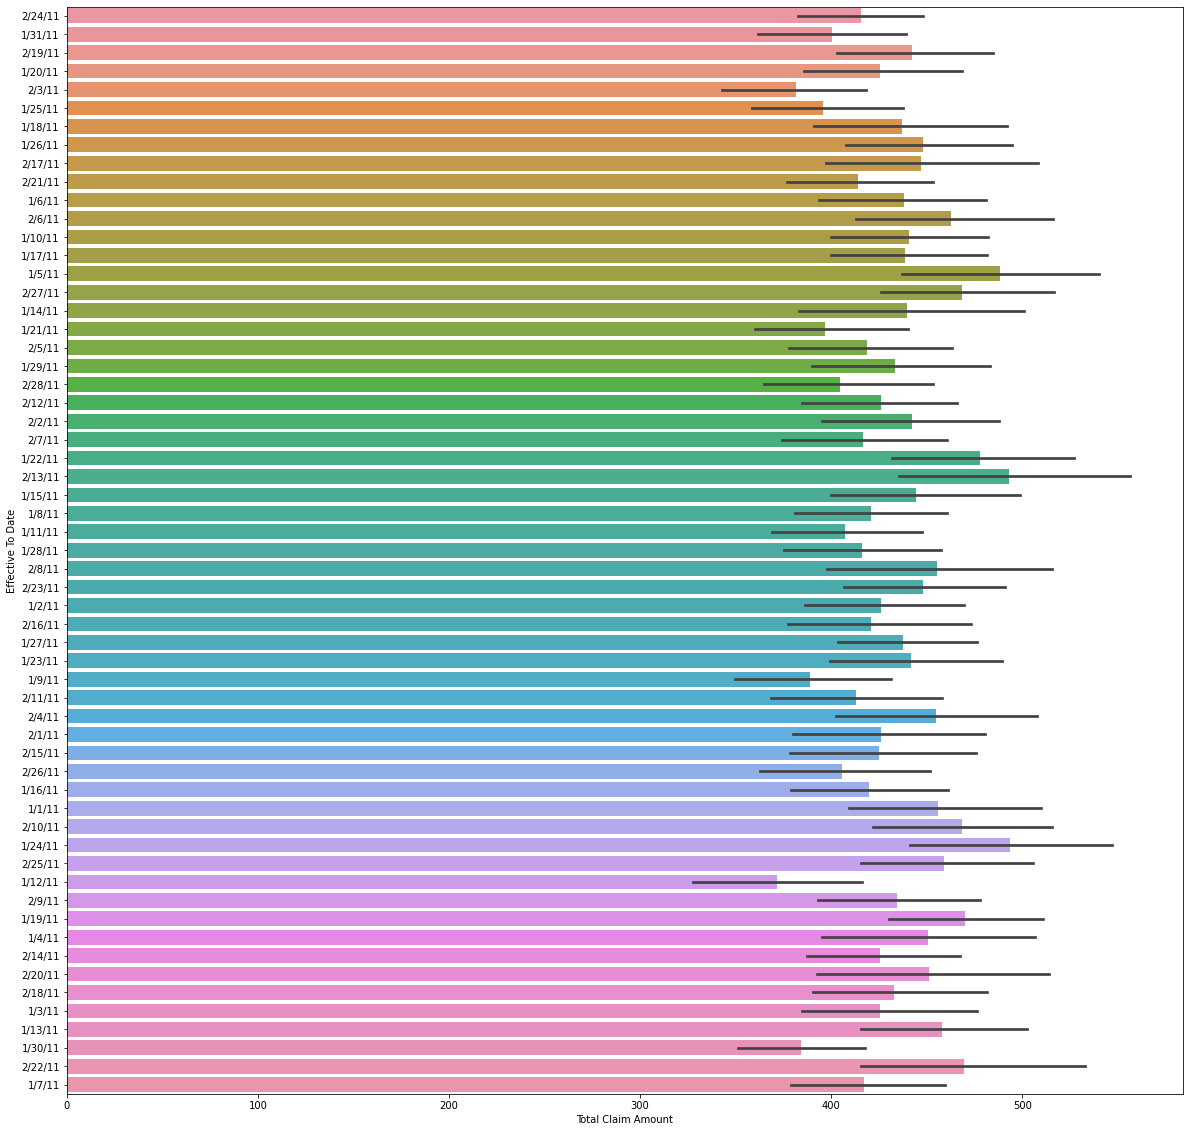

In [63]:
plt.figure(figsize=(20,20))
sns.barplot(data=categoricals,x=data['Total Claim Amount'],y='Effective To Date')
#we can see in what day 

In [7]:
categoricals['Effective To Date']=categoricals['Effective To Date'].replace('/','',regex=True)

In [8]:
categoricals['Effective To Date'] #mes/dia/año

0       22411
1       13111
2       21911
3       12011
4        2311
        ...  
9129    21011
9130    21211
9131     2611
9132     2311
9133    21411
Name: Effective To Date, Length: 9134, dtype: object

In [9]:
import re

In [14]:
#podríamos sacar el mes, día y año por seperado 
def month(x):
  x=str(x)
  if len(x)<5:
    return np.nan
  else: 
    pattern='\d'
    mt=re.findall(pattern,x)[0]
    return int(mt)

In [15]:
data['month']=list(map(month,data['Effective To Date']))

In [16]:
data['month']

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: month, Length: 9134, dtype: int64